<a href="https://colab.research.google.com/github/CHYaswanth/SVHN-Image-classification/blob/master/SVHN_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.2.0'

#### Checking GPU allotment

In [2]:
from tensorflow import keras
tf.test.gpu_device_name()

'/device:GPU:0'

#### Mounting Drive

In [3]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Loading the DataSet

In [44]:
import h5py
import numpy as np

#open file as readonly
h5f = h5py.File('/content/drive/My Drive/Neural Net Project/SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [0]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

#close file
h5f.close()

In [46]:
print('X train shape : ', X_train.shape)
print('y train shape : ', y_train.shape)
print('\n')

print('X val shape : ', X_val.shape)
print('y val shape : ', y_val.shape)
print('\n')

print('X test shape : ', X_test.shape)
print('y test shape : ', y_test.shape)
print('\n')

X train shape :  (42000, 32, 32)
y train shape :  (42000,)


X val shape :  (60000, 32, 32)
y val shape :  (60000,)


X test shape :  (18000, 32, 32)
y test shape :  (18000,)




### Visualizing the DataSet

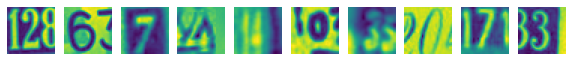

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [47]:
# visualizing the first 10 images in the Train set and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

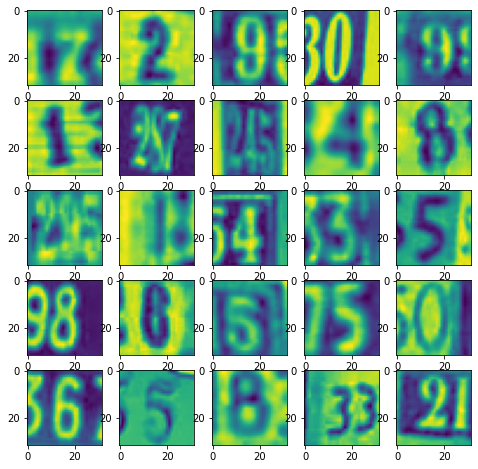

In [48]:
# visualizing the test set images
fig=plt.figure(figsize=(8, 8))
columns=5
rows=5
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### Data PreProcessing

In [0]:
# Changing dimensions to N x D = 32x32

X_tr = X_train.reshape(len(X_train), X_train.shape[1] * X_train.shape[2])
X_te = X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2])
X_va = X_val.reshape(len(X_val), X_val.shape[1] * X_val.shape[2])

In [50]:
print('Shapes of test/train/validation sets:')
print('Test :', X_tr.shape)
print('Test :', X_te.shape)
print('Test :', X_va.shape)

Shapes of test/train/validation sets:
Test : (42000, 1024)
Test : (18000, 1024)
Test : (60000, 1024)


In [0]:
# normalizing input from 0-255 to 0-1

X_tr = X_tr / 255.0
X_te = X_te / 255.0
X_val = X_val /255.0

In [0]:
# converting y data into categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical

y_tr = to_categorical(y_train)
y_te = to_categorical(y_test)
y_va = to_categorical(y_val)

In [53]:
print('Final Shape of the train/test/val sets:')
print(X_tr.shape, X_te.shape, X_va.shape)
print(y_tr.shape, y_te.shape,y_va.shape)

Final Shape of the train/test/val sets:
(42000, 1024) (18000, 1024) (60000, 1024)
(42000, 10) (18000, 10) (60000, 10)


## Useful Functions

In [0]:
# Plotting the train/ validation loss

def plot_loss(history):
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='val')
  plt.title('Loss for train/val sets')
  plt.ylabel('Loss')
  plt.xlabel(' # of epoch')
  plt.legend(loc="upper left")

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='val')
  plt.title('Accuracy for train/val sets')
  plt.ylabel('Accuracy')
  plt.xlabel(' # of epoch')
  plt.legend(loc="upper left")

# Basic NN

### Architecture

**Layer in Network (No.of Neurons in the layer)**  
Input Layer (1024) -> Layer 1 (500) -> Layer 2 (250) -> Layer 3 (100) -> Layer 4 (50) ->  Output Layer (10)   


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

## Fucntion for NN Model

In [0]:
def NN_model(iterations, lr, Lambda, activation, optimizer, verb=True, evaluate=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    output_nodes = 10
    activation_fn = activation
    opt_algo = optimizer
    returns = []
    verbose = 0

    if(verb):
      verbose = 1
    
    model = Sequential()
    model.add(Dense(500, input_shape=(1024,), activation=activation_fn))
    model.add(Dense(250, activation=activation_fn))
    model.add(Dense(100, activation=activation_fn))
    model.add(Dense(50, activation=activation_fn))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    ## optimizer 1
    sgd = optimizers.SGD(lr=learning_rate,decay=1e-6, momentum=0.9)
    
    ## optimizer 2
    adam = optimizers.Adam(lr = learning_rate)

    if(opt_algo == 'SGD'):
      opt_algo = sgd
    else:
      opt_algo = adam

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    history = model.fit(X_tr, y_tr, epochs=iterations, batch_size=500, validation_data=(X_va,y_va), verbose=verbose)
    returns.append(history)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plot_loss(history)

    plt.subplot(1,2,2)
    plot_accuracy(history)
    plt.show()

    if(evaluate):
      # model evaluation
      score = model.evaluate(X_te, y_te, verbose=0)
      returns.append(score)
    else:
      score = model.evaluate(X_va, y_va, verbose=0)
      returns.append(score)

    return returns

## 1. Basic Neural network

lr = 0.01  
lamba = 0  
activation = 'sigmoid'  
optimizer = SGD  
model evaluation = false



Epoch 1/10
84/84 [==============================] - 1s 8ms/step - loss: 2.3241 - accuracy: 0.1023 - val_loss: 2.3035 - val_accuracy: 0.0997
Epoch 2/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3034 - accuracy: 0.0980 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 3/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3036 - accuracy: 0.0975 - val_loss: 2.3030 - val_accuracy: 0.1003
Epoch 4/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3034 - accuracy: 0.1007 - val_loss: 2.3028 - val_accuracy: 0.1004
Epoch 5/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3034 - accuracy: 0.0995 - val_loss: 2.3042 - val_accuracy: 0.1008
Epoch 6/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3037 - accuracy: 0.0990 - val_loss: 2.3031 - val_accuracy: 0.1033
Epoch 7/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3033 - accuracy: 0.0997 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 8/10
84/84 [==

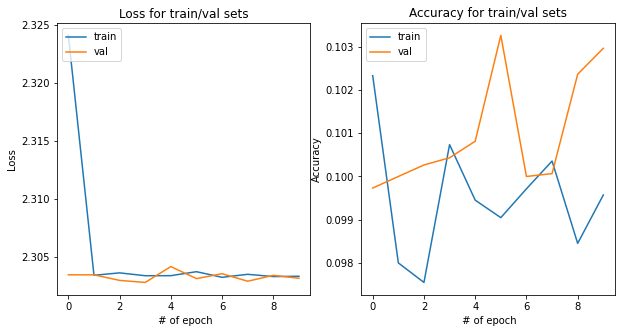

 [2.303175449371338, 0.10296666622161865]]

In [72]:
NN_model(10, 0.01, 0, activation='sigmoid', optimizer='SGD')

**Train accuracy ~ 10 % is expected for un-trianed model. so model architecture of fine.**  



#### sanity check 

lr = 0.01  
lamba = 1e2 (high regularization) we expect loss to increase substantially  

All remaining paramters stay similar to the previous run. 

Epoch 1/10
84/84 [==============================] - 1s 8ms/step - loss: 205.1033 - accuracy: 0.0972 - val_loss: 2.4175 - val_accuracy: 0.1000
Epoch 2/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3318 - accuracy: 0.0977 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 3/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3039 - accuracy: 0.1018 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 4/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3037 - accuracy: 0.1012 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 5/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3037 - accuracy: 0.1020 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3039 - accuracy: 0.1013 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
84/84 [==============================] - 1s 7ms/step - loss: 2.3038 - accuracy: 0.0995 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 8/10
84/84 [

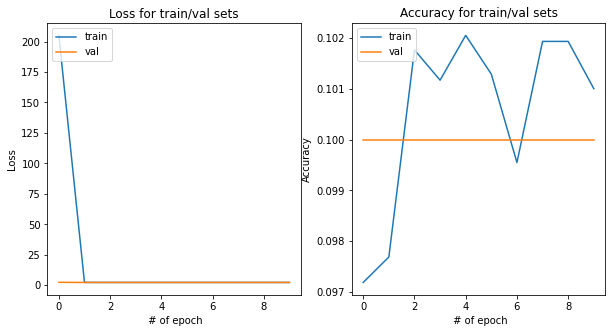

 [2.3042242527008057, 0.10000000149011612]]

In [74]:
NN_model(10, 0.01, 1e2, activation='sigmoid', optimizer='adam')

As expected loss has shooted up..  
So our model is performing as expected. 

So lets proceed to tune our hyperparameters 

## 2. Tune: 1 Model

We will start with small learning of 1e-5  
and a small Lambda regulariazation of 1e-7  

Epoch 1/50
84/84 [==============================] - 1s 8ms/step - loss: 2.5374 - accuracy: 0.0997 - val_loss: 2.5321 - val_accuracy: 0.1000
Epoch 2/50
84/84 [==============================] - 1s 7ms/step - loss: 2.5274 - accuracy: 0.0997 - val_loss: 2.5222 - val_accuracy: 0.1000
Epoch 3/50
84/84 [==============================] - 1s 7ms/step - loss: 2.5178 - accuracy: 0.0997 - val_loss: 2.5129 - val_accuracy: 0.1000
Epoch 4/50
84/84 [==============================] - 1s 7ms/step - loss: 2.5087 - accuracy: 0.0997 - val_loss: 2.5041 - val_accuracy: 0.1000
Epoch 5/50
84/84 [==============================] - 1s 7ms/step - loss: 2.5002 - accuracy: 0.0997 - val_loss: 2.4958 - val_accuracy: 0.1000
Epoch 6/50
84/84 [==============================] - 1s 7ms/step - loss: 2.4921 - accuracy: 0.0997 - val_loss: 2.4879 - val_accuracy: 0.1000
Epoch 7/50
84/84 [==============================] - 1s 8ms/step - loss: 2.4845 - accuracy: 0.0997 - val_loss: 2.4805 - val_accuracy: 0.1000
Epoch 8/50
84/84 [==

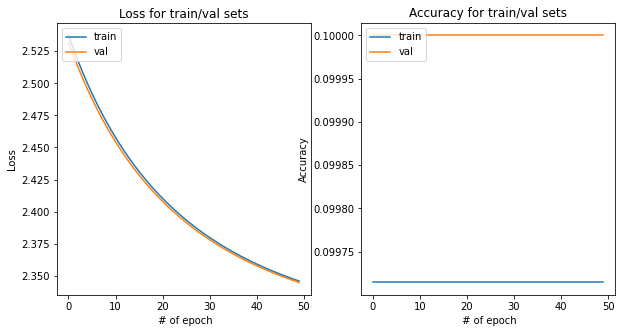

Model Accuracy is :  [2.3447792530059814, 0.10000000149011612]


In [75]:
lr = 1e-5
Lambda = 1e-7

tune_model_1 = NN_model(50, lr, Lambda, activation='sigmoid', optimizer='SGD')

print('Model Accuracy is : ', tune_model_1[1]) 

We notice loss is not decreasing substancially. 

So we try to do a hyper parameter seach to find out the best learning rate and lambda



Epoch 1/100
84/84 [==============================] - 1s 8ms/step - loss: 2.4019 - accuracy: 0.0993 - val_loss: 2.3240 - val_accuracy: 0.0991
Epoch 2/100
84/84 [==============================] - 1s 7ms/step - loss: 2.3119 - accuracy: 0.0985 - val_loss: 2.3054 - val_accuracy: 0.1002
Epoch 3/100
84/84 [==============================] - 1s 7ms/step - loss: 2.3049 - accuracy: 0.1010 - val_loss: 2.3043 - val_accuracy: 0.1037
Epoch 4/100
84/84 [==============================] - 1s 7ms/step - loss: 2.3044 - accuracy: 0.1012 - val_loss: 2.3042 - val_accuracy: 0.1033
Epoch 5/100
84/84 [==============================] - 1s 7ms/step - loss: 2.3045 - accuracy: 0.1014 - val_loss: 2.3042 - val_accuracy: 0.1024
Epoch 6/100
84/84 [==============================] - 1s 7ms/step - loss: 2.3045 - accuracy: 0.1017 - val_loss: 2.3042 - val_accuracy: 0.1019
Epoch 7/100
84/84 [==============================] - 1s 7ms/step - loss: 2.3044 - accuracy: 0.1021 - val_loss: 2.3042 - val_accuracy: 0.0993
Epoch 8/100
8

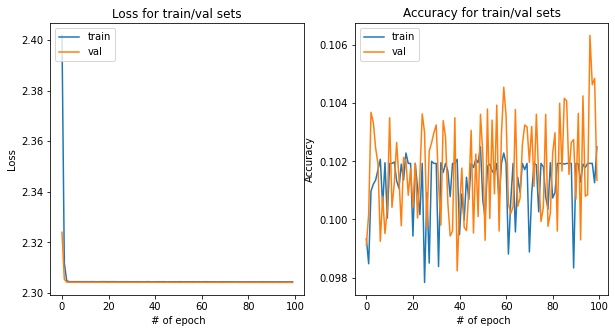

Model Accuracy is :  10.135000199079514


In [76]:
lr = 1e-3
Lambda = 1e-4

tune_model_1 = NN_model(100, lr, Lambda, activation='sigmoid', optimizer='SGD')

print('Model Accuracy is : ', tune_model_1[1][1]*100) 

Epoch 1/100
84/84 [==============================] - 1s 8ms/step - loss: 2.3061 - accuracy: 0.1087 - val_loss: 26.4538 - val_accuracy: 0.1123
Epoch 2/100
84/84 [==============================] - 1s 7ms/step - loss: 2.2965 - accuracy: 0.1335 - val_loss: 21.6874 - val_accuracy: 0.1397
Epoch 3/100
84/84 [==============================] - 1s 7ms/step - loss: 2.2907 - accuracy: 0.1570 - val_loss: 22.5377 - val_accuracy: 0.1688
Epoch 4/100
84/84 [==============================] - 1s 7ms/step - loss: 2.2850 - accuracy: 0.1760 - val_loss: 23.1428 - val_accuracy: 0.1751
Epoch 5/100
84/84 [==============================] - 1s 7ms/step - loss: 2.2789 - accuracy: 0.1921 - val_loss: 23.9609 - val_accuracy: 0.1921
Epoch 6/100
84/84 [==============================] - 1s 7ms/step - loss: 2.2723 - accuracy: 0.2056 - val_loss: 28.3387 - val_accuracy: 0.1928
Epoch 7/100
84/84 [==============================] - 1s 7ms/step - loss: 2.2645 - accuracy: 0.2137 - val_loss: 29.1196 - val_accuracy: 0.1937
Epoch 

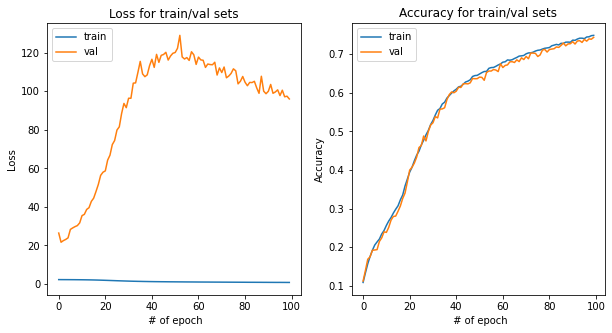

Model Accuracy is :  74.38333630561829


In [77]:
lr = 1e-3
Lambda = 1e-4

tune_model_1 = NN_model(100, lr, Lambda, activation='relu', optimizer='adam')

print('Model Accuracy is : ', tune_model_1[1][1]*100) 

Using RELU activation we notice the model accuracy has almost doubled.   

No now lets try out a hyperparameter search to find out best lr and lambda.

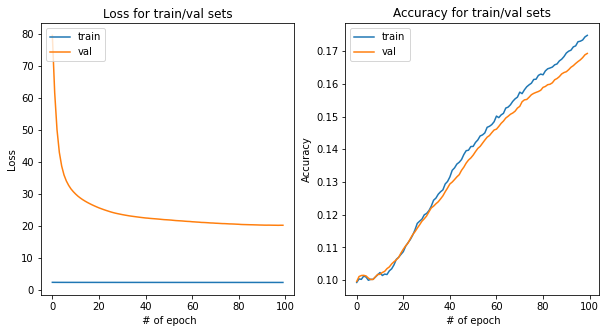

Try 1: Best_val_acc: 16.928333044052124, lr: 0.00024231990197062624, Lambda: 0.00011825095086124315



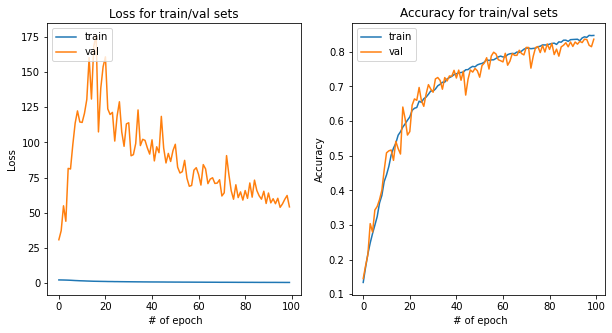

Try 2: Best_val_acc: 83.65833163261414, lr: 0.035027489810496214, Lambda: 0.0006339015050637577



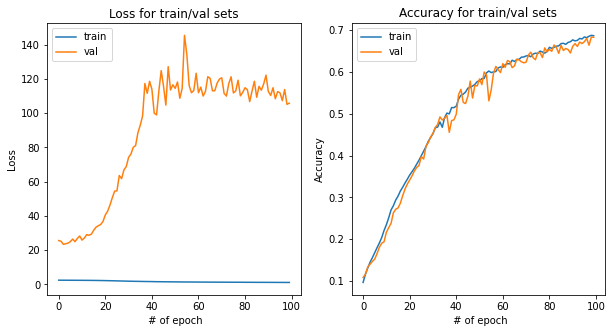

Try 3: Best_val_acc: 68.31666827201843, lr: 0.008032176342090469, Lambda: 0.007762438383756013



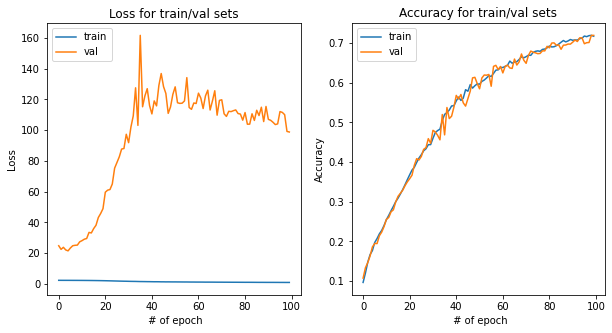

Try 4: Best_val_acc: 71.91333174705505, lr: 0.00901699551449987, Lambda: 4.156575281784356e-05



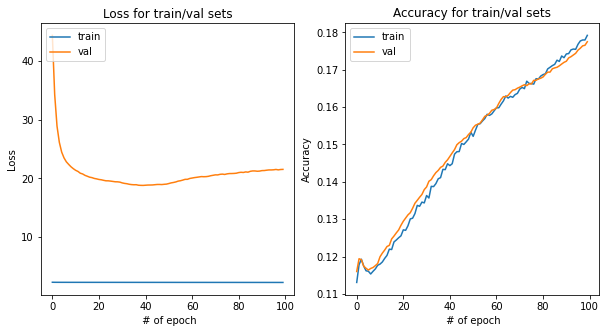

Try 5: Best_val_acc: 17.748333513736725, lr: 0.00044713694337735626, Lambda: 0.00013492163051603715



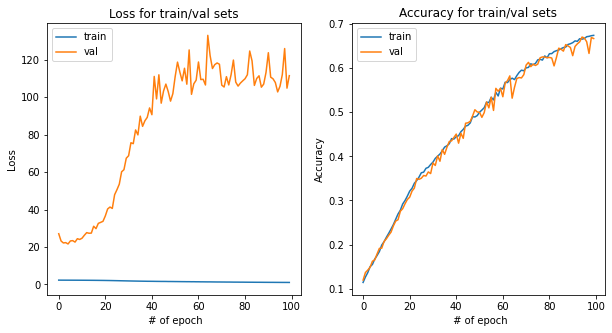

Try 6: Best_val_acc: 66.73499941825867, lr: 0.005794271548457901, Lambda: 0.0007531433024318179



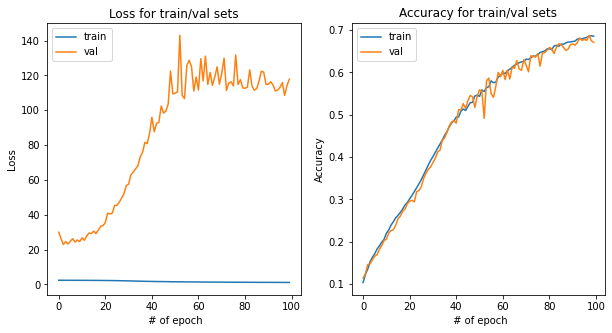

Try 7: Best_val_acc: 67.08833575248718, lr: 0.007339633227380982, Lambda: 0.0033448136492532565



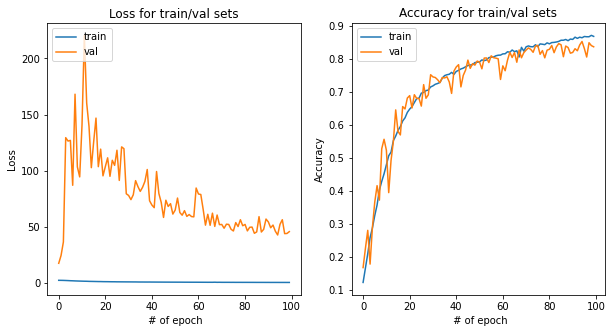

Try 8: Best_val_acc: 83.75499844551086, lr: 0.07176692726700978, Lambda: 0.0024934974571595584



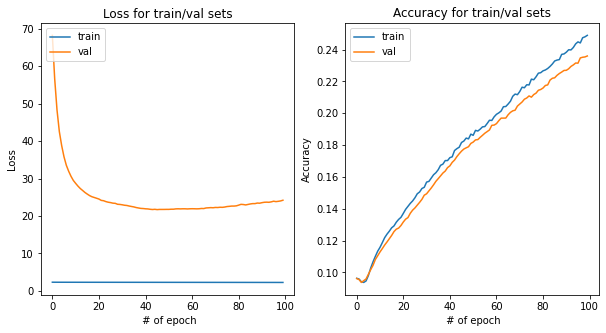

Try 9: Best_val_acc: 23.594999313354492, lr: 0.0005700670604206724, Lambda: 1.104812662251239e-05



In [69]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-5,-2))
    best_acc = NN_model(100, lr, Lambda, activation='relu', optimizer='SGD', verb=False)
    print("Try {0}: Best_val_acc: {1}, lr: {2}, Lambda: {3}\n".format(k, best_acc[1][1]*100, lr, Lambda))

With Optimizer as 'Adam'

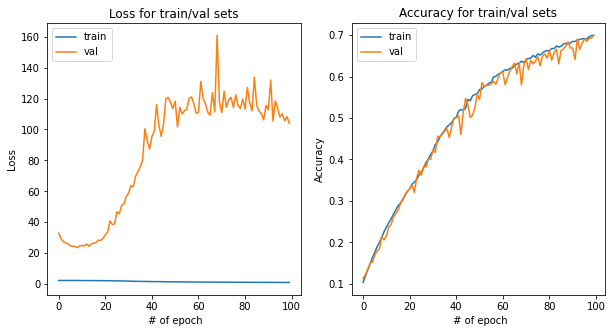

Try 1: Best_val_acc: 69.9666678905487, lr: 0.0070805874989978935, Lambda: 0.003094632290117887



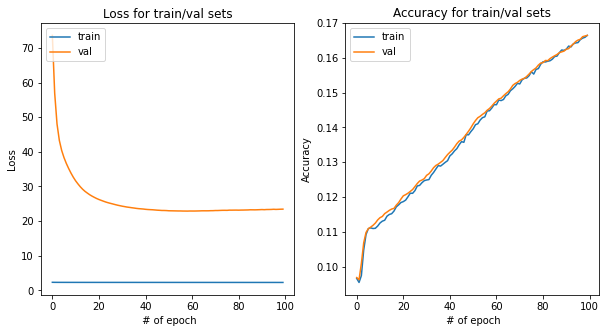

Try 2: Best_val_acc: 16.646666824817657, lr: 0.00024450210988207605, Lambda: 8.442712011859077e-05



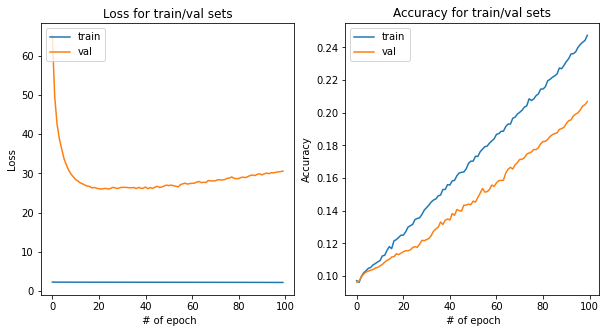

Try 3: Best_val_acc: 20.68166732788086, lr: 0.0009647440931734565, Lambda: 1.0848099096708629e-05



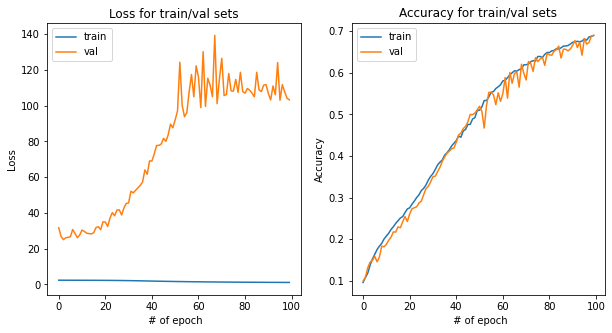

Try 4: Best_val_acc: 68.99999976158142, lr: 0.00600935057808751, Lambda: 0.001526387857083314



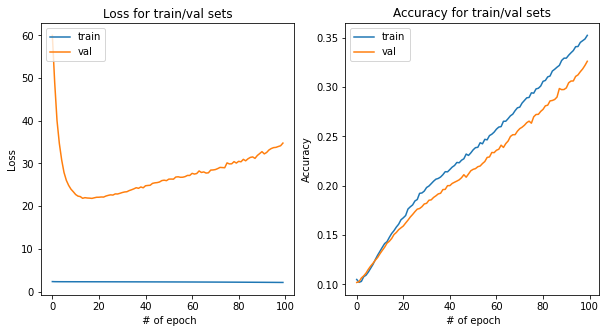

Try 5: Best_val_acc: 32.6116681098938, lr: 0.0012440493821484105, Lambda: 1.0183999589831132e-05



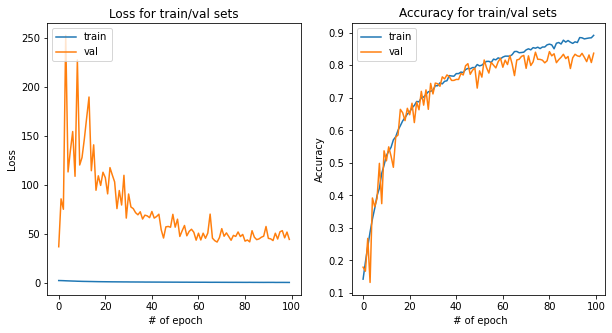

Try 6: Best_val_acc: 83.6899995803833, lr: 0.08929520534749122, Lambda: 1.4944470624503996e-05



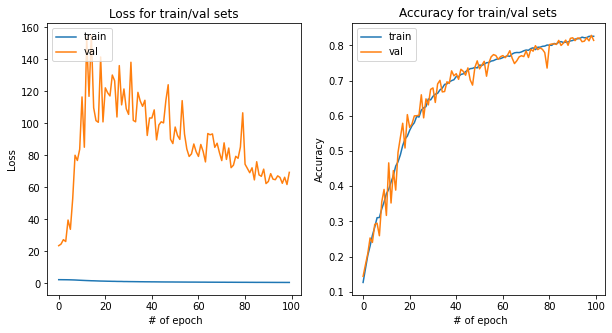

Try 7: Best_val_acc: 81.44833445549011, lr: 0.021581364094984904, Lambda: 4.2964288551092116e-05



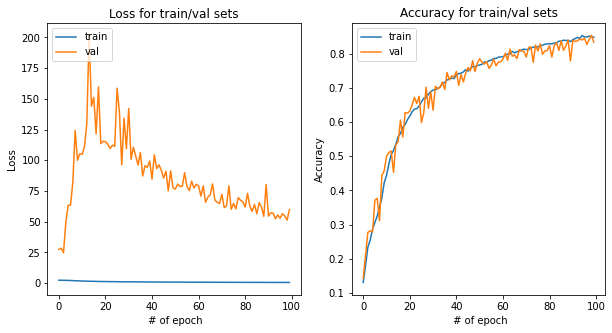

Try 8: Best_val_acc: 83.3383321762085, lr: 0.03265786354553806, Lambda: 3.654081415828999e-05



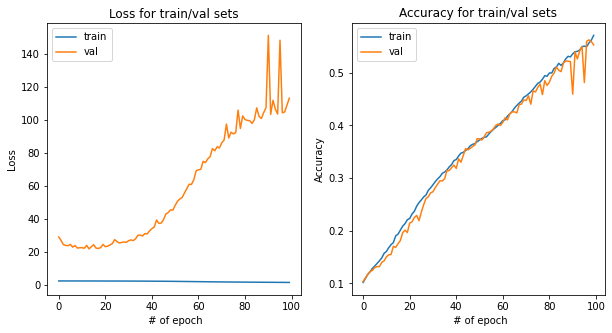

Try 9: Best_val_acc: 55.285000801086426, lr: 0.0034501220668984663, Lambda: 1.8936987336054162e-05



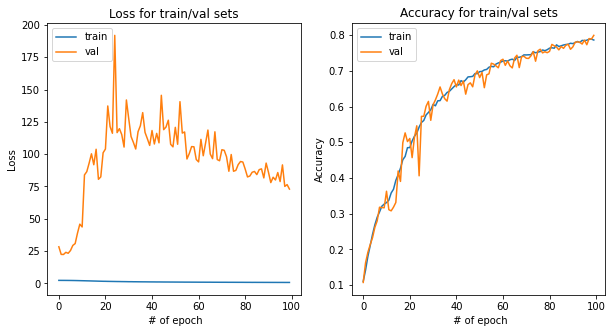

Try 10: Best_val_acc: 79.94999885559082, lr: 0.014762122732050919, Lambda: 0.0001225325831208506



In [70]:
import math
for k in range(1,11):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-5,-2))
    best_acc = NN_model(100, lr, Lambda, activation='relu', optimizer='adam', verb=False)
    print("Try {0}: Best_val_acc: {1}, lr: {2}, Lambda: {3}\n".format(k, best_acc[1][1]*100, lr, Lambda))